In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [4]:
# function 1D
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3

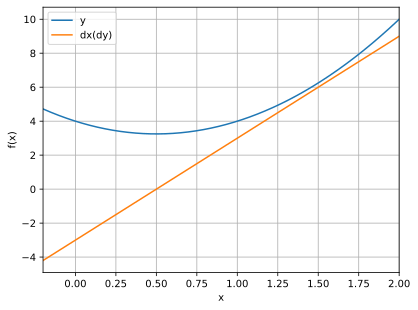

In [146]:
# plot the function and its dx

# define a range for x
x = np.linspace(-0.2,2,2001)

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dx(dy)'])
plt.show()

In [26]:
#helps visualize how accurate gradient descent is for finding local minimum 
# random starting point
localmin = np.random.choice(x,1)
print(localmin)

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

localmin

[1.2421]


array([0.5])

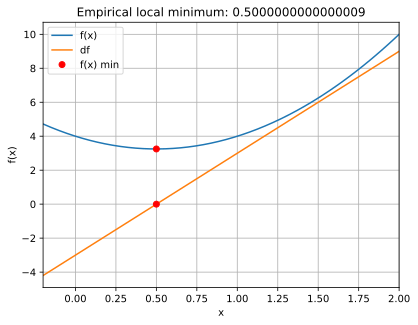

In [28]:
# plot the results

plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

In [30]:
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training and store all the results
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,0] = localmin
  modelparams[i,1] = grad

/var/folders/d4/_hpfqphj071158367x6z8zsr0000gq/T/ipykernel_18786/4135714960.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparams[i,0] = localmin
/var/folders/d4/_hpfqphj071158367x6z8zsr0000gq/T/ipykernel_18786/4135714960.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparams[i,1] = grad


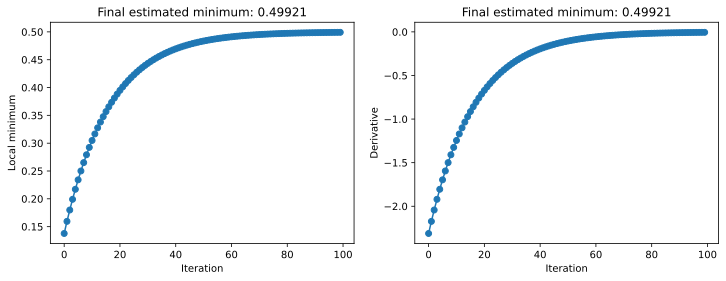

In [32]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

In [202]:
# random starting point
localmin = np.random.choice(x,1)
# define a range for x (defined above but just to make sure)
x = np.linspace(-5,50,2001)
# learning parameters, stop the learning when the derivative gets to a low value (0.1?, 0.01?)
learning_rate = .1
localmin_list = []
grad_list = []
grad = deriv(localmin)
grad_threshold = 0.1
loop_count = []
counter = 0
grad = deriv(localmin)
# run through training and store all the results
#store the iteration itself for graphing 
while grad > grad_threshold:
  localmin_list.append(localmin.item())
  grad_list.append(grad.item())
  loop_count.append(counter)
  localmin = localmin - learning_rate*grad
  grad = deriv(localmin)
  counter += 1
  
#convert lists to arrays
modelparams = np.column_stack((localmin_list, grad_list))
loop_count = np.array(loop_count)

In [204]:
print(grad_list)

[252.285, 100.91399999999999, 40.36559999999999, 16.146239999999995, 6.458495999999997, 2.583398399999999, 1.0333593599999995, 0.41334374400000007, 0.16533749760000038]


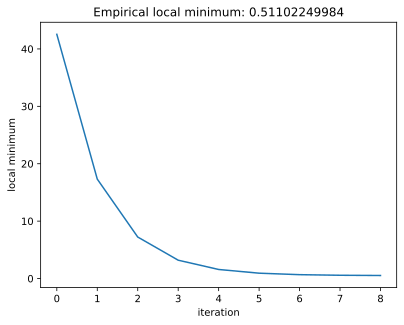

In [206]:
plt.plot(loop_count, modelparams[:, 0], label='Local Min')
plt.xlabel('iteration')
plt.ylabel('local minimum')
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

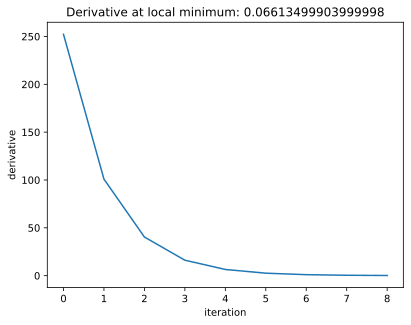

In [208]:
plt.plot(loop_count, modelparams[:, 1], label='Derivative')
plt.xlabel('iteration')
plt.ylabel('derivative')
plt.title('Derivative at local minimum: %s'%grad[0])
plt.show()

In [11]:
#try another function 
# define a range for x
x = np.linspace(-2,2,2001)

# function (as a function)
def fx(x):
  return np.cos(2*np.pi*x)+x**2

# derivative function
def deriv(x):
  return -2*np.pi*np.sin(2*np.pi*x)+ 2*x

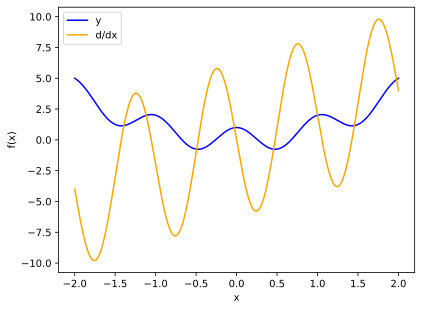

In [21]:
plt.plot(x, fx(x), color='blue', label='f(x)')   
plt.plot(x, deriv(x), color='orange', label='d/dx')  
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','d/dx'])
plt.show()

In [36]:
# start at random or start at 0
localmin = np.random.choice(x,1) #np.array([0])
#localmin = np.array([0])
#localmin = np.array([0.001])
# learning parameters
learning_rate = .01
training_epochs = 100

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

localmin

array([1.42506741])